# 2.6 Data Analysis
##  Example 2, Part 6: pH-Rate Profile Example - Kirby 2002

Tony Kirby is one of the giants of physical organic and bio-organic chemistry. In this paper he follows up on a decades-long series of papers investigating the mechanism of *amylases* that catalyze the hydrolysis of acetal groups in polysaccharide chains.

``Concerted general acid and nucleophilic catalysis of acetalhydrolysis. A simple model for the lysozyme mechanism''. K.E.S. Deana, A.J. Kirby, *J. Chem. Soc., Perkin Trans. 2*, **2002**, 428-432. https://doi.org/10.1039/B110948K. 

This *Python* notebook will curve fit the equation the model for the values of $k_1$ and $k_2$. Both are observed rate consatnts for different reactions that demonstrate acid and base catalysis. $k_1$ is the observed rate constant for acetal hydrolysis in the starting material and $k_2$ is the observed rate consant for ester hydrolysis of the intermediate. Both rate constants have a dependance on pH, indicating acid/base catalysis.

## The Equation

For our reaction system...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

We have determined the values of $k_1$ and $k_2$ along a series of different values for $\left[H^+\right]$

For $k_1$, the model for acid/base catalysis is $\frac{-d[A]}{dt} = k_1 [A]$. We will see that this observed rate is the total of the rate of neutral caroxylic acid attack at the protonated acetal group ($k_{AH_3^+}[AH_3^+]$), the rate of neutral caroxylic acid attack on the neutral acetal group with general-acid assistance from the other neutral carboxylic acid ($k_{AH_3^+}[AH_3^+]$), and the rate of attack of the anionic carboxylate attack on the neutral acetal group with general-acid assistance from the other neutral caroxylic acid($k_{AH_3^+}[AH_3^+]$). The rate of nucleophilic attack on an acetal without acid catalysis is negligible so there is no rate contibution for the dianion or for direct hydroxide attack. Thus the total value for the rate could be taken to be...

$$\begin{align*}
\frac{-d[A]}{dt} =\nu &= \nu_{AH_3^+} + \nu_{AH_2} + \nu_{AH^-} \\
                  \nu &= k_{AH_3}[AH_3^+] + k_{AH_2}[AH_2] + k_{AH}[AH^-]
\end{align*}
$$

There are three acid equilibria here...

$$\begin{align*}
K_{a_{AH_3}} &= \frac{[AH_2][H^+]}{[AH_3^+]} \\
K_{a_{AH_2}} &= \frac{[AH^-][H^+]}{[AH_2]} \\
K_{a_{AH}} &= \frac{[A^{2-}][H^+]}{[AH^-]} 
\end{align*}
$$

...and...

$$[A] = [AH_3^+] + [AH_2] + [AH^-] + [A^{2-}]$$

### The Equations as Used by the Authors

The authors of the paper considered the value of $[AH_3^+]$ to be insignificant relative to $[A]_t$ in the pH range studies. This is a reasonable statement as the protonated acetal, which will contribute greatly to the observed rate of reaction, is still only a tiny fraction of the population unless we reach extreme acidity. We will not be able to determine the value of $K_{a_{AH_3^+}}$ from the curve fit and it is best to ignore it. In practice this means that $k_{AH_3^+}$ will be a second-order rate consant for the reaction of $AH_2$ and $H^+$ to give the product and that the value of $k_{AH_3^+}$ will include wthe value of $K_{a_{AH_3^+}}$ within it.

So the equation 4 in the paper is derived from the following rate law and value for $[A]_t$...

$$\begin{align*}
\nu &= k_{H}[H^+][AH_2] + k_{AH_2}[AH_2] + k_{AH}[AH^-] \\
[A] &= [AH_2] + [AH^-] + [A^{2-}]
\end{align*}
$$
...where $k_{H^+}$ is the second-order rate constant for the specific acid catalyzed reaction of the neutral diacid.

With the two statements above we can derive the equation that describes the value of $k_1$ as $[H^+]$ changes.

$$ \nu_T = 
\frac{k_{H}[H^+]^3 + {k_{AH_2} [H^+]^2} + k_{AH}K_{a_{AH_2}}[H^+]}
{{ [H^+]^2} + { K_{a_{AH_2}} [H^+]} + { K_{a_{AH_2}} K_{a_{AH}}} } [A]$$

And so the observed rate constant at a given pH is described by the following equation...

$$ k_1 = 
\frac{k_{H^+}[H^+]^3 + {k_{AH_2} [H^+]^2} + k_{AH}K_{a_{AH_2}}[H^+]}
{{ [H^+]^2} + { K_{a_{AH_2}} [H^+]} + { K_{a_{AH_2}} K_{a_{AH}}} } $$
...where...
$$ \nu = k_1 [A]$$

### A Note on $k_H$

 If we consider the rate contribution for the $AH_3^+$ species we would have...

$$\nu_{AH_3^+}=k_{AH_3}[AH_3^+] = k_{AH_3}\frac{[H^+][AH_2]}{K_{a_{AH_3}}} $$

...thus we see that $k_{H} =  k_{AH_3} / K_{a_{AH_3^+}}$ and the two values of $k_{AH_3}$ and $K_{a_{AH_3}}$ cannot be determined independantly unless we get to extreme acidities where we see the Arrhenius complex forming in the rate profile (we would need to see the curve leveling off to detect the value of $K_{a_{AH_3}}$.)

## Load the Data

Let use load in the data set we obtained from the kinetic runs. in the code below we will import the data and plot the values of $k_1$ v pH.

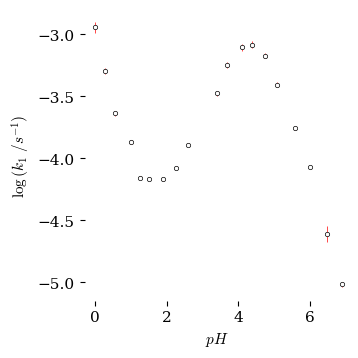

In [124]:
import pandas as pd

df = pd.read_csv("results2.csv", skipinitialspace=True, comment="#")

x = df["pH"]
y1 = unp.uarray(df["log_k1 value"],df["log_k1 stdev"])
#y1 = unp.log10(y1)

y1n = unp.nominal_values(y1)
y1s = unp.std_devs(y1)

######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

# Settings for plot
ax.set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
#       ylim=[-0.03,0.65]
       )

### Data graphics
ax.scatter(x, y1n, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.errorbar(x, y1n, y1s*10, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0)

### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06A_Kirby2_data_k1.pdf")
plt.show()




## Define the Function

For a curve fit we must first create a function that takes the x-axis values and parameters and returns the y-values. We can then use an experimental set of x and y-values to find the parameters that give a best fit. First let us plot the data from our values for $k_1$ vs pH against a line calculated using parameters from table 2 in the paper.

We see that the fit is very close. But we will perform our own line fit eventually anyway.

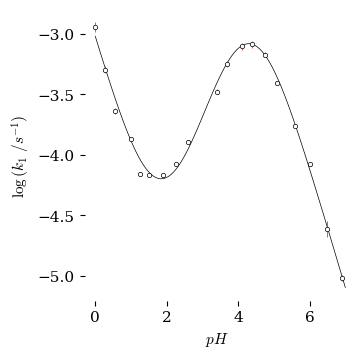

In [125]:
### Curve Fit
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as un
from uncertainties import unumpy as unp

def catalysis(pH, k_H, k_AH2, k_AH, pKa_AH = 4.76, pKa_AH2 = 3.85):

    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion

    k_obs = (k_H * H**3 + k_AH2 * H**2 + k_AH * Ka_AH2 * H) \
        / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)

    return(k_obs)


pH_array = np.linspace(0,7,100)
k_H = 9.2E-4      # rate for specific acid catalysis of AH2 species (protonated AH2)
k_AH = 1.4E-3     # rate for monoanion species
k_AH2 = 3.7E-5    # rate for AH2 neutral species

k_obs = catalysis(pH_array, k_H, k_AH2, k_AH)
log_k_obs = np.log10(k_obs)


######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

# Settings for plot
ax.set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
#       ylim=[-0.03,0.65]
       )

### Data graphics
ax.scatter(x, y1n, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.errorbar(x, y1n, y1s*10, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0, zorder = 3)
ax.plot(pH_array, log_k_obs, color = "black", linewidth = 0.5, zorder = 1)

### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06B_Kirby2_data_k1_with_fit_using_paper_parameters.pdf")
plt.show()



## Curve Fit

Here we will use lmfit to fit the data to the model and see if we get values close to those reported by the authors.  We will also see if our calculated standard deviations are similar.

catalysis(pH, k_H, k_AH2, k_AH, pKa_AH = 4.76, pKa_AH2 = 3.85)

19 19
[[Model]]
    Model(catalysis)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 19
    # variables        = 3
    chi-square         = 0.00409654
    reduced chi-square = 2.5603e-04
    Akaike info crit   = -154.398986
    Bayesian info crit = -151.565669
    R-squared          = 0.98523658
[[Variables]]
    k_H:    9.7431e-04 +/- 5.1318e-05 (5.27%) (init = 0.000924)
    k_AH2:  3.1391e-05 +/- 8.6115e-06 (27.43%) (init = 0.0014)
    k_AH:   0.00137085 +/- 3.6036e-05 (2.63%) (init = 3.7e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_H, k_AH2)  = -0.4285
    C(k_AH2, k_AH) = -0.2106
(k_H) = (9.7431+/-0.5132)e-04
(k_AH2) = (3.1391+/-0.8611)e-05
(k_AH) = (1.3708+/-0.0360)e-03


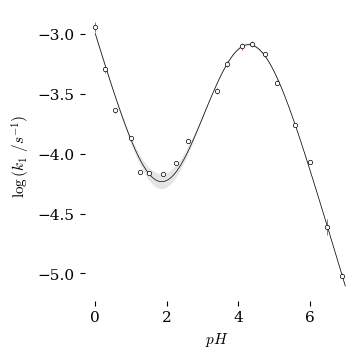

In [126]:
# x is pH, y1n is data (s-1) and y1s is stdevs

import lmfit     

def catalysis(pH, k_H, k_AH2, k_AH):

    pKa_AH = 4.76
    pKa_AH2 = 3.85
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion

    k_obs = (k_H * H**3 + k_AH2 * H**2 + k_AH * Ka_AH2 * H) \
        / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)

    return(k_obs)

##########################
### use lmfit to fit data to function 
##########################

y = y1n
ys = y1s
pH = df["pH"]
x = pH

#y = y1n[2:]
#ys = y1s[2:]
#pH = df["pH"]
#x = pH[2:]


print(len(x),len(y))

mod = lmfit.Model(catalysis, nan_policy = 'omit')  # load the function f as the model to be fit

                                    # state the parameters (use the text strings that we used above in sympy)
pars = mod.make_params(k_H = dict(value = 9.24E-4, min = 1E-15),
                       k_AH2 = dict(value = 1.4E-3, min = 1E-15),
                       k_AH = dict(value = 3.7E-5, min = 1E-15),
#                       pKa_AH = dict(value = 4.76, min = 1E-15),
#                       pKa_AH2 = dict(value = 3.85, min = 1E-15),
                       )    # initial values are also set here
                                    
result = mod.fit(10**y, pars, pH=x, weights = 1/ys)  # Use the .fit method on the model object to perform the curve fit
                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())

k_H_fit = result.uvars['k_H']
k_AH2_fit = result.uvars['k_AH2']
k_AH_fit = result.uvars['k_AH']
#
print(f"(k_H) = {k_H_fit:0.4e}")
print(f"(k_AH2) = {k_AH2_fit:0.4e}")
print(f"(k_AH) = {k_AH_fit:0.4e}")

pH_array = np.linspace(0,7,100)

k_obs = result.eval(pH=pH_array)
devs = result.eval_uncertainty(pH=pH_array, sigma = 1)

y_fit = unp.uarray(k_obs,devs)
log_y = unp.log10(y_fit)

y_values = unp.nominal_values(log_y)
y_stdev = unp.std_devs(log_y)


######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

# Settings for plot
ax.set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
#       ylim=[-0.03,0.65]
       )

### Data graphics
ax.scatter(x, y, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.errorbar(x, y, ys*10, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0, zorder = 3)
ax.plot(pH_array, y_values, color = "black", linewidth = 0.5, zorder = 1)

######################
#### Create Confidence band upper and lower bounds
######################

# upper and lower bounds of uncertain kobs as float values
fit_up = y_values + y_stdev
fit_dn = y_values - y_stdev

# make filled band
ax.fill_between(pH_array, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")


### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06B_Kirby2_data_k1_with_fit_using_paper_parameters.pdf")
plt.show()


[[Model]]
    Model(catalysis)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 81
    # data points      = 19
    # variables        = 5
    chi-square         = 12820.8945
    reduced chi-square = 915.778181
    Akaike info crit   = 133.773458
    Bayesian info crit = 138.495653
    R-squared          = 0.98959035
[[Variables]]
    k_H:      7.8218e-04 +/- 8.7452e-05 (11.18%) (init = 0.000924)
    k_AH2:    3.4960e-05 +/- 5.3781e-06 (15.38%) (init = 0.0014)
    k_AH:     0.00108273 +/- 1.6535e-04 (15.27%) (init = 3.7e-05)
    pKa_AH:   4.90754388 +/- 0.08223377 (1.68%) (init = 4.76)
    pKa_AH2:  3.62709758 +/- 0.10818598 (2.98%) (init = 3.85)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_AH, pKa_AH)    = -0.9521
    C(k_AH, pKa_AH2)   = +0.8683
    C(pKa_AH, pKa_AH2) = -0.8236
    C(k_H, k_AH2)      = -0.7179
    C(k_AH2, pKa_AH2)  = +0.5549
    C(k_H, pKa_AH2)    = -0.3353
    C(k_AH2, k_AH)     = +0.2539
    C(k_AH2, pKa_AH)   = -0.2378

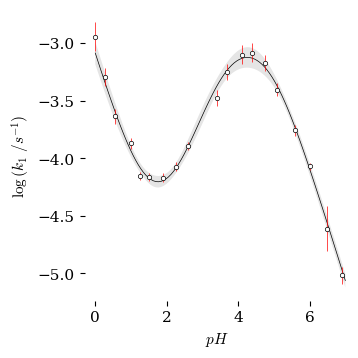

In [131]:
# x is pH, y1n is data (s-1) and y1s is stdevs

import lmfit  
import pandas as pd

df = pd.read_csv("results2.csv", skipinitialspace=True, comment="#")

x = df["pH"]
y1 = unp.uarray(df["log_k1 value"],df["log_k1 stdev"])
#y1 = unp.log10(y1)

y1n = unp.nominal_values(y1)
y1s = unp.std_devs(y1)

def catalysis(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):

    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion

    k_obs = (k_H * H**3 + k_AH2 * H**2 + k_AH * Ka_AH2 * H) \
        / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)
    
    log_k_obs = np.log10(k_obs)

    return(log_k_obs)

##########################
### use lmfit to fit data to function 
##########################

y = y1n
ys = y1s
pH = df["pH"]
x = pH

#y = y1n[2:]
#ys = y1s[2:]
#pH = df["pH"]
#x = pH[2:]



mod = lmfit.Model(catalysis, nan_policy = 'omit')  # load the function f as the model to be fit

                                    # state the parameters (use the text strings that we used above in sympy)
pars = mod.make_params(k_H = dict(value = 9.24E-4, min = 1E-15),
                       k_AH2 = dict(value = 1.4E-3, min = 1E-15),
                       k_AH = dict(value = 3.7E-5, min = 1E-15),
                       pKa_AH = dict(value = 4.76, min = 1, max = 7),
                       pKa_AH2 = dict(value = 3.85, min = 1, max = 7),
                       )    # initial values are also set here
                                    
result = mod.fit(y, pars, pH=x,
                 weights = 1/ys)  # Use the .fit method on the model object to perform the curve fit
                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())
print()
print(result.ci_report())


k_H_fit = result.uvars['k_H']
k_AH2_fit = result.uvars['k_AH2']
k_AH_fit = result.uvars['k_AH']
pKa_AH2 = result.uvars['pKa_AH2']
pKa_AH = result.uvars['pKa_AH']
#
print(f"log k_H = {unp.log10(k_H_fit):0.4f}")
print(f"log k_AH2 = {unp.log10(k_AH2_fit):0.4f}")
print(f"log k_AH = {unp.log10(k_AH_fit):0.4f}")
print(f"pKa_AH2 = {pKa_AH2:0.4f}")
print(f"pKa_AH = {pKa_AH:0.4f}")

pH_array = np.linspace(0,7,100)

log_y = result.eval(pH=pH_array)
devs = result.eval_uncertainty(pH=pH_array, sigma = 2)

### y_fit = unp.uarray(k_obs,devs)
### log_y = k_obs
### 
### y_values = unp.nominal_values(log_y)
### y_stdev = unp.std_devs(log_y)


######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

# Settings for plot
ax.set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
#       ylim=[-0.03,0.65]
       )

### Data graphics
ax.scatter(x, y, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.errorbar(x, y, ys*30, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0, zorder = 3)
ax.plot(pH_array, log_y, color = "black", linewidth = 0.5, zorder = 1)

######################
#### Create Confidence band upper and lower bounds
######################

# upper and lower bounds of uncertain kobs as float values
fit_up = log_y + devs
fit_dn = log_y - devs

# make filled band
ax.fill_between(pH_array, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")


### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06B_Kirby2_data_k1_with_fit_using_paper_parameters.pdf")
plt.show()


     pH    k_1    k_2
0  0.00  113.0    NaN
1  0.28   51.4    NaN
2  0.55   23.1  13.10
3  1.00   13.4   6.15
4  1.10    NaN   3.66
     pH     k_1
0  0.00  113.00
1  0.28   51.40
2  0.55   23.10
3  1.00   13.40
5  1.25    6.96
[[Model]]
    Model(catalysis)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 128
    # data points      = 19
    # variables        = 5
    chi-square         = 0.04454381
    reduced chi-square = 0.00318170
    Akaike info crit   = -105.058699
    Bayesian info crit = -100.336504
    R-squared          = 0.99206913
[[Variables]]
    k_H:      8.7315e-04 +/- 7.1977e-05 (8.24%) (init = 0.000924)
    k_AH2:    3.5594e-05 +/- 6.3601e-06 (17.87%) (init = 0.0014)
    k_AH:     0.00124492 +/- 1.7956e-04 (14.42%) (init = 3.7e-05)
    pKa_AH:   4.81440377 +/- 0.07943319 (1.65%) (init = 4.76)
    pKa_AH2:  3.75579058 +/- 0.12039884 (3.21%) (init = 3.85)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_AH, pKa_AH)    = -0.9385


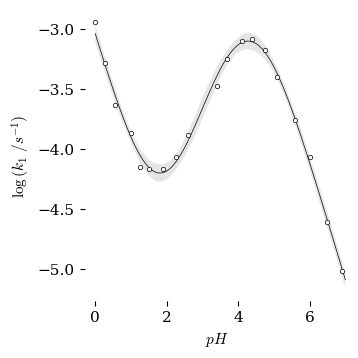

In [130]:
# No weights used

# x is pH, y1n is data (s-1) and y1s is stdevs

import lmfit  
import pandas as pd

df = pd.read_csv("data/Fig1-Kirby2002_data.csv", skipinitialspace=True, comment="#")
print(df.head())

df2 = df[["pH","k_1"]].dropna()
print(df2.head())



x = df["pH"]
y = df["k_1"]*1E-5
log_y = np.log10(y)

def catalysis(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):

    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion

    k_obs = (k_H * H**3 + k_AH2 * H**2 + k_AH * Ka_AH2 * H) \
        / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)
    
    log_k_obs = np.log10(k_obs)

    return(log_k_obs)

##########################
### use lmfit to fit data to function 
##########################




mod = lmfit.Model(catalysis, nan_policy = 'omit')  # load the function f as the model to be fit

                                    # state the parameters (use the text strings that we used above in sympy)
pars = mod.make_params(k_H = dict(value = 9.24E-4, min = 1E-15),
                       k_AH2 = dict(value = 1.4E-3, min = 1E-15),
                       k_AH = dict(value = 3.7E-5, min = 1E-15),
                       pKa_AH = dict(value = 4.76, min = 1, max = 7),
                       pKa_AH2 = dict(value = 3.85, min = 1, max = 7),
                       )    # initial values are also set here
                                    
result = mod.fit(log_y, pars, pH=x)  # Use the .fit method on the model object to perform the curve fit
                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())
print()
#print(result.ci_report())


print(result.ci_report())


k_H_fit = result.uvars['k_H']
k_AH2_fit = result.uvars['k_AH2']
k_AH_fit = result.uvars['k_AH']
pKa_AH2 = result.uvars['pKa_AH2']
pKa_AH = result.uvars['pKa_AH']
#
print(f"log k_H = {unp.log10(k_H_fit):0.4f}")
print(f"log k_AH2 = {unp.log10(k_AH2_fit):0.4f}")
print(f"log k_AH = {unp.log10(k_AH_fit):0.4f}")
print(f"pKa_AH2 = {pKa_AH2:0.4f}")
print(f"pKa_AH = {pKa_AH:0.4f}")

pH_array = np.linspace(0,7,100)

log_y_calc = result.eval(pH=pH_array)
devs = result.eval_uncertainty(pH=pH_array, sigma = 2)

######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

# Settings for plot
ax.set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
#       ylim=[-0.03,0.65]
       )

### Data graphics
ax.scatter(x, log_y, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.plot(pH_array, log_y_calc, color = "black", linewidth = 0.5, zorder = 1)

######################
#### Create Confidence band upper and lower bounds
######################

# upper and lower bounds of uncertain kobs as float values
fit_up = log_y_calc + devs
fit_dn = log_y_calc - devs

# make filled band
ax.fill_between(pH_array, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")


### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06B_Kirby2_data_k1_with_fit_using_paper_data.pdf")
plt.show()


In [132]:
result.weights

array([242.15615709, 369.46337034, 445.29088183, 628.98063838,
       852.38772477, 895.76986094, 824.03624816, 777.1831867 ,
       866.798417  , 436.92041156, 417.72384772, 359.29339344,
       357.84798181, 429.93927425, 537.33289851, 656.96473401,
       979.09238873, 154.72448531, 416.66666667])

$[A]_t = [AH_3^+] + [AH_2] + [AH^-] + [A^{2-}]$


$$AH_3 = \frac{AH_2 \cdot H}{K_{a_{AH_3}}}$$
$$HA_2$$
$$AH = \frac{K_{a_{AH_2}} \cdot AH_2 }{H}$$
$$A = \frac{K_{a_{AH}} \cdot AH }{H} $$

$$ A = \frac{K_{a_{AH}} \cdot \frac{K_{a_{AH_2}} \cdot AH_2 }{H} }{H}   $$
$$ A = \frac{K_{a_{AH}} \cdot {K_{a_{AH_2}}} \cdot AH_2 }{H^2}$$

$$[A]_t = \frac{AH_2 \cdot H}{K_{a_{AH_3}}} + [AH_2] + \frac{K_{a_{AH_2}} \cdot AH_2 }{H} + \frac{K_{a_{AH}} \cdot {K_{a_{AH_2}}} \cdot AH_2 }{H^2}$$

$$[A]_t = AH_2\left(\frac{ H}{K_{a_{AH_3}}} + 1 + \frac{K_{a_{AH_2}} }{H} + \frac{K_{a_{AH}} \cdot {K_{a_{AH_2}}} }{H^2}\right)$$

$$[A]_t = AH_2\left(\frac{ H^3}{K_{a_{AH_3}}H^2} + \frac{K_{a_{AH_3}}H^2}{K_{a_{AH_3}}H^2} + \frac{K_{a_{AH_3}} K_{a_{AH_2}} H}{ K_{a_{AH_3}}H^2} + \frac{K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }{K_{a_{AH_3}} H^2}\right)$$

$$[A]_t = AH_2\frac{{ H^3} + {K_{a_{AH_3}}H^2} + {K_{a_{AH_3}} K_{a_{AH_2}} H} + {K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }}{{K_{a_{AH_3}}H^2}}$$

$$ AH_2 = [A]_t\frac{{K_{a_{AH_3}}H^2}}{{ H^3} + {K_{a_{AH_3}}H^2} + {K_{a_{AH_3}} K_{a_{AH_2}} H} + {K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }}$$

$$ \nu_{AH_2} = [A]_t
\frac{{k_{AH_2} K_{a_{AH_3}}H^2}}
{{ H^3} + {K_{a_{AH_3}}H^2} + {K_{a_{AH_3}} K_{a_{AH_2}} H} + {K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }}$$

$$ \nu = [A]_t
\frac{k_{AH_3^+}H^3 + {k_{AH_2} K_{a_{AH_3}}H^2} + k_{AH^-}K_{a_{AH_3}}K_{a_{AH_2}}H}
{{ H^3} + {K_{a_{AH_3}}H^2} + {K_{a_{AH_3}} K_{a_{AH_2}} H} + {K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }}$$



## Plot the Data


Always do a quick visual check of your data. Perhaps its all noise? the code below will plot all the abs vs time traces in a single plot.

